# Gender Classification

### Importing the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading dataset

In [6]:
data = pd.read_csv('Transformed Data Set - Logistics regression.csv')

### Data Exploration

In [9]:
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [13]:
data.describe(include='O').T

,count,unique,top,freq
Favorite Color,66,3,Cool,37
Favorite Music Genre,66,7,Rock,19
Favorite Beverage,66,6,Doesn't drink,14
Favorite Soft Drink,66,4,Coca Cola/Pepsi,32
Gender,66,2,F,33


In [15]:
data.isna().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

### Checking value counts

In [18]:
data['Favorite Color'].value_counts()

Favorite Color
Cool       37
Warm       22
Neutral     7
Name: count, dtype: int64

In [20]:
data['Favorite Beverage'].value_counts()

Favorite Beverage
Doesn't drink    14
Beer             13
Other            11
Wine             10
Vodka             9
Whiskey           9
Name: count, dtype: int64

In [22]:
data['Favorite Music Genre'].value_counts()

Favorite Music Genre
Rock                19
Pop                 17
Hip hop              8
Electronic           8
R&B and soul         6
Folk/Traditional     4
Jazz/Blues           4
Name: count, dtype: int64

In [24]:
data['Favorite Soft Drink'].value_counts()

Favorite Soft Drink
Coca Cola/Pepsi    32
Fanta              14
7UP/Sprite         13
Other               7
Name: count, dtype: int64

In [26]:
data['Gender'].value_counts()

Gender
F    33
M    33
Name: count, dtype: int64

### Converting into numerical data

In [35]:
data.replace({'Gender':{'F':0,'M':1}},inplace=True)

C:\Users\Johnson\AppData\Local\Temp\ipykernel_388\3460422156.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Gender':{'F':0,'M':1}},inplace=True)


In [37]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,0
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,0
2,Warm,Rock,Wine,Coca Cola/Pepsi,0
3,Warm,Folk/Traditional,Whiskey,Fanta,0
4,Cool,Rock,Vodka,Coca Cola/Pepsi,0
...,...,...,...,...,...
61,Cool,Rock,Vodka,Coca Cola/Pepsi,1
62,Cool,Hip hop,Beer,Coca Cola/Pepsi,1
63,Neutral,Hip hop,Doesn't drink,Fanta,1
64,Cool,Rock,Wine,Coca Cola/Pepsi,1


### Label encoder

In [40]:
from sklearn.preprocessing import LabelEncoder

In [42]:
le = LabelEncoder()

In [48]:
for i in ['Favorite Color','Favorite Music Genre','Favorite Beverage','Favorite Soft Drink']:
    data[i] = le.fit_transform(data[i])

In [50]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0
...,...,...,...,...,...
61,0,6,3,1,1
62,0,2,0,1,1
63,1,2,1,2,1
64,0,6,5,1,1


### Splitting into feature and target data

In [53]:
X = data.drop('Gender',axis=1)
y = data['Gender']

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

### Standard Scaler

In [60]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc = StandardScaler()

In [64]:
for i in [X_train,X_test]:
    i = sc.fit_transform(i)

In [66]:
X_train

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
51,0,6,1,1
42,2,5,1,1
31,1,6,0,1
37,0,4,2,2
38,0,4,4,2
43,0,6,5,0
46,0,2,5,1
29,0,0,1,2
15,2,3,5,1
17,0,6,2,1


### Implementation of Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

In [71]:
lr = LogisticRegression()

In [75]:
lr.fit(X_train,y_train)

LogisticRegression()

In [77]:
y_pred = lr.predict(X_test)

In [79]:
y_pred

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

In [81]:
y_test

2     0
3     0
59    1
8     0
62    1
44    1
58    1
56    1
27    0
40    1
20    0
32    0
49    1
61    1
Name: Gender, dtype: int64

### Accuray Score

In [84]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy_score(y_test,y_pred)

0.5

### Confusion Matrix

In [89]:
from sklearn.metrics import confusion_matrix

In [93]:
cm = confusion_matrix(y_test,y_pred)

In [95]:
cm

array([[2, 4],
       [3, 5]], dtype=int64)

<Axes: >

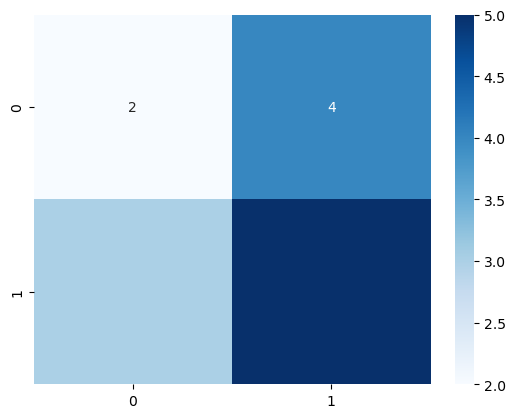

In [103]:
sns.heatmap(cm,annot=True,cmap='Blues')